# SOAL 10
Train an SVM regressor on the California housing dataset

# load the data

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [2]:
X = housing['data']
y = housing['target']


In [3]:
#split the data with library train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


d:\Materi_data-science\Code\Excercise SVM\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


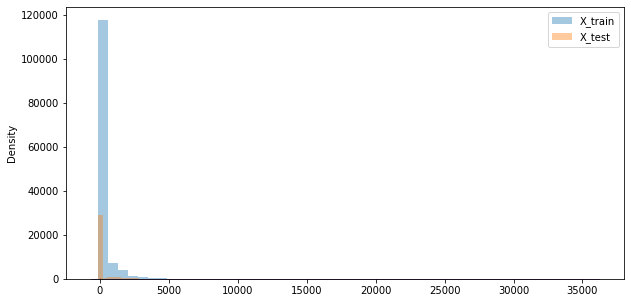

In [4]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(a=X_train,label='X_train',kde=False)
sns.distplot(a=X_test,label='X_test',kde=False)
sns.kdeplot(data=X_train,shade=True)
sns.kdeplot(data=X_test,shade=True)
plt.legend()
plt.show()

jadi dapat dilihat bahwa pada data 0 -1000 memiliki penyebaran data yang cukup tinggi

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [29]:
X_test_scaled

array([[-1.14237625, -0.30073951, -0.43367721, ...,  0.52022395,
         0.22194113,  0.25541734],
       [-0.69050482,  0.098724  , -0.13050312, ..., -0.16293193,
        -0.20947715,  0.02976613],
       [-0.18616932,  1.85636346, -0.51063381, ..., -0.91557569,
         1.03788441, -1.46454628],
       ...,
       [ 2.87008893, -0.30073951,  0.65618087, ..., -0.09978765,
         0.80810728, -1.2689819 ],
       [-0.55565035,  0.57808022, -0.04116447, ..., -0.21494651,
         0.5548835 , -0.120668  ],
       [-0.14789765, -0.93988113, -0.50645235, ...,  0.43607226,
        -0.64089543,  0.57634349]])

In [6]:
# create the baseline model used by linear svc
from sklearn.svm import LinearSVR
lin_svr_base = LinearSVR(random_state=42)
lin_svr_base.fit(X_train_scaled,y_train)

d:\Materi_data-science\Code\Excercise SVM\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [7]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
y_pred_base=lin_svr_base.predict(X_test_scaled)
print(r2_score(y_test,y_pred_base))
print(np.sqrt(mean_squared_error(y_test,y_pred_base)))#mse validasi error

0.3053617812548246
0.9540755517635613


In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $15,000. Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`:

In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform # digunakan untu melakukan 
# random pada saat proses randomisasi dengan cross validasi

param_distributions = {'gamma': reciprocal(0.001, 1.0), 'C':uniform(1,10)}
random_search_cv = RandomizedSearchCV(SVR(),param_distributions,n_iter=10,verbose=2,cv=3,random_state=42)
random_search_cv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......C=4.745401188473625, gamma=0.7114476009343418; total time=  12.5s
[CV] END ......C=4.745401188473625, gamma=0.7114476009343418; total time=  12.3s
[CV] END ......C=4.745401188473625, gamma=0.7114476009343418; total time=  11.8s
[CV] END ......C=8.31993941811405, gamma=0.06251373574521747; total time=   8.2s
[CV] END ......C=8.31993941811405, gamma=0.06251373574521747; total time=   8.5s
[CV] END ......C=8.31993941811405, gamma=0.06251373574521747; total time=   8.5s
[CV] END ...C=2.560186404424365, gamma=0.0029375384576328287; total time=   7.5s
[CV] END ...C=2.560186404424365, gamma=0.0029375384576328287; total time=   7.5s
[CV] END ...C=2.560186404424365, gamma=0.0029375384576328287; total time=   7.5s
[CV] END .....C=1.5808361216819946, gamma=0.3967605077052987; total time=   7.7s
[CV] END .....C=1.5808361216819946, gamma=0.3967605077052987; total time=   8.0s
[CV] END .....C=1.5808361216819946, gamma=0.3967

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002232C8FBF10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002232C350880>},
                   random_state=42, verbose=2)

In [36]:
random_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.7114476009343418)

In [37]:
y_predict_cv_train=random_search_cv.best_estimator_.predict(X_train_scaled)
print(r2_score(y_train,y_predict_cv_train))
print(np.sqrt(mean_squared_error(y_train,y_predict_cv_train)))

0.837797739984588
0.46564841575120397


In [40]:
y_predict_cv_test=random_search_cv.best_estimator_.predict(X_test_scaled)
print(r2_score(y_test,y_predict_cv_test))
print(np.sqrt(mean_squared_error(y_test,y_predict_cv_test)))

0.765612233546531
0.5542055878015458


In [34]:
mse = mean_squared_error(y_test, y_predict_cv_test)
np.sqrt(mse)

1.2592505376583067